baseurl:  https://min-api.cryptocompare.com/data/v2/histohour
timeframe:  hour
parameters:  {'fsym': 'BTC', 'tsym': 'USD', 'limit': 1000, 'aggregate': 1}


No handles with labels found to put in legend.


                         high       low      open  volumefrom      volumeto     close conversionType conversionSymbol
time                                                                                                                 
2021-09-19 00:00:00  48376.30  47926.42  48312.46      555.89  2.675176e+07  47943.71         direct                 
2021-09-19 01:00:00  47943.75  47623.13  47943.71      865.63  4.136785e+07  47883.18         direct                 
2021-09-19 02:00:00  48021.72  47785.43  47883.18      481.72  2.309508e+07  48015.84         direct                 
2021-09-19 03:00:00  48045.77  47806.20  48015.84      365.82  1.752445e+07  47858.77         direct                 
2021-09-19 04:00:00  48037.31  47786.76  47858.77      447.50  2.142130e+07  47860.94         direct                 
...                       ...       ...       ...         ...           ...       ...            ...              ...
2021-10-30 12:00:00  61698.88  61410.84  61611.00      5

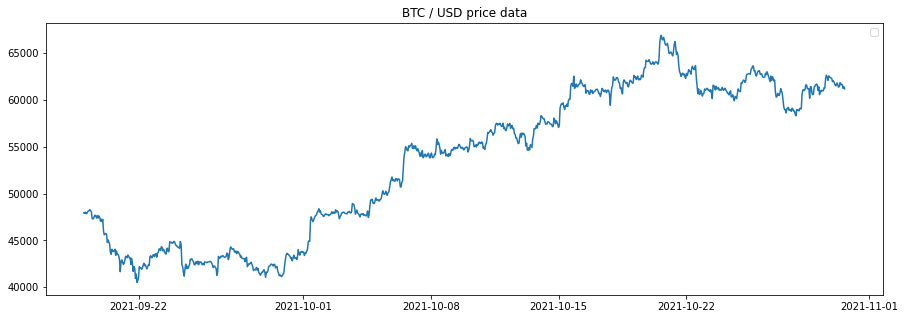

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import requests
from datetime import datetime
# pretty printing of pandas dataframe
pd.set_option('expand_frame_repr', False) 

def get_hist_data(from_sym='BTC', to_sym='USD', timeframe = 'minute', limit=20000, aggregation=1, exchange=''):
    
    url = 'https://min-api.cryptocompare.com/data/v2/histo'
    url += timeframe
    
    parameters = {'fsym': from_sym,
                  'tsym': to_sym,
                  'limit': limit,
                  'aggregate': aggregation}
    if exchange:
        print('exchange: ', exchange)
        parameters['e'] = exchange    
    
    print('baseurl: ', url) 
    print('timeframe: ', timeframe)
    print('parameters: ', parameters)
    
    # response comes as json
    response = requests.get(url, params=parameters)   
    
    data = response.json()['Data']['Data'] 

    return data  

def data_to_dataframe(data):
    #data from json is in array of dictionaries
    df = pd.DataFrame.from_dict(data)
    
    # time is stored as an epoch, we need normal dates
    df['time'] = pd.to_datetime(df['time'], unit='s')
    df.set_index('time', inplace=True)
    print(df)
    
    return df

def plot_data(df, cryptocurrency, target_currency):
    # got his warning because combining matplotlib 
    # and time in pandas converted from epoch to normal date
    # To register the converters:
    # 	>>> from pandas.plotting import register_matplotlib_converters
    # 	>>> register_matplotlib_converters()
    #  warnings.warn(msg, FutureWarning)
    
    from pandas.plotting import register_matplotlib_converters
    register_matplotlib_converters()
    
    plt.figure(figsize=(15,5))
    plt.title('{} / {} price data'.format(cryptocurrency, target_currency))
    plt.plot(df.index, df.close)
    plt.legend()
    plt.show()
    
    return None    

cryptocurrency = 'BTC'
target_currency = 'USD'

data = get_hist_data(cryptocurrency, target_currency, 'hour', 1000)
df = data_to_dataframe(data)
df.to_csv('kuchbhi.csv')
plot_data(df, cryptocurrency, target_currency)

baseurl:  https://min-api.cryptocompare.com/data/v2/histohour
timeframe:  hour
parameters:  {'fsym': 'BTC', 'tsym': 'USD', 'limit': 2000, 'aggregate': 1}


No handles with labels found to put in legend.


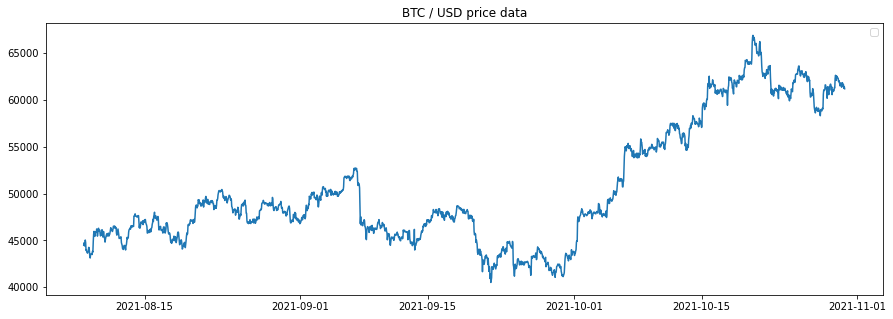

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import requests
from datetime import datetime
# pretty printing of pandas dataframe
pd.set_option('expand_frame_repr', False) 

def get_hist_data(from_sym='BTC', to_sym='USD', timeframe = 'minute', limit=40000, aggregation=1, exchange=''):
    
    url = 'https://min-api.cryptocompare.com/data/v2/histo'
    url += timeframe
    
    parameters = {'fsym': from_sym,
                  'tsym': to_sym,
                  'limit': limit,
                  'aggregate': aggregation}
    if exchange:
        print('exchange: ', exchange)
        parameters['e'] = exchange    
    
    print('baseurl: ', url) 
    print('timeframe: ', timeframe)
    print('parameters: ', parameters)
    
    # response comes as json
    response = requests.get(url, params=parameters)   
    
    data = response.json()['Data']['Data'] 

    return data  

def data_to_dataframe(data):
    #data from json is in array of dictionaries
    df = pd.DataFrame.from_dict(data)
    
    # time is stored as an epoch, we need normal dates
    df['time'] = pd.to_datetime(df['time'], unit='s')
    df.set_index('time', inplace=True)
    
    return df

def plot_data(df, cryptocurrency, target_currency):
    # got his warning because combining matplotlib 
    # and time in pandas converted from epoch to normal date
    # To register the converters:
    # 	>>> from pandas.plotting import register_matplotlib_converters
    # 	>>> register_matplotlib_converters()
    #  warnings.warn(msg, FutureWarning)
    
    from pandas.plotting import register_matplotlib_converters
    register_matplotlib_converters()
    
    plt.figure(figsize=(15,5))
    plt.title('{} / {} price data'.format(cryptocurrency, target_currency))
    plt.plot(df.index, df.close)
    plt.legend()
    plt.show()
    
    return None    

cryptocurrency = 'BTC'
target_currency = 'USD'

data = get_hist_data(cryptocurrency, target_currency, 'hour', 2000)
df = data_to_dataframe(data)
df.to_csv('kuchbhi.csv')
plot_data(df, cryptocurrency, target_currency)